In [ ]:
import cv2 as cv 
import numpy as np
import pandas as pd
import math
import matplotlib.image as mpimg
from skimage import io
from google.colab.patches import cv2_imshow # for image display

%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80791  100 80791    0     0   616k      0 --:--:-- --:--:-- --:--:--  621k


Text(0.5, 1.0, 'B')

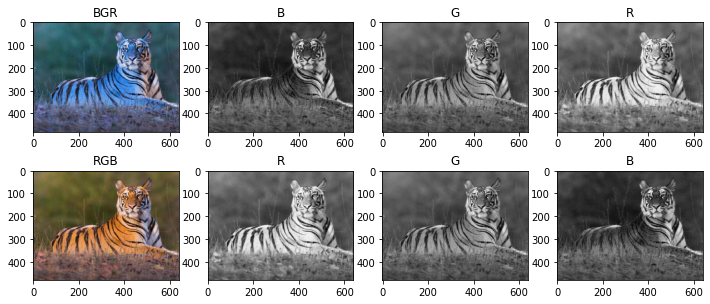

In [ ]:
# Activity 1.1
from matplotlib import pyplot as plt

# photo_url = "https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg"

!curl -o tiger.jpg https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg

bgr_img = cv.imread('tiger.jpg')

# cv2_imshow(bgr_img)

plt.figure(figsize=(12, 5))

# BGR
plt.subplot(2, 4, 1) 
plt.imshow(bgr_img, cmap="gray")
plt.title('BGR')

plt.subplot(2, 4, 2)
plt.imshow(bgr_img[:, :, 0], cmap="gray")
plt.title('B')

plt.subplot(2, 4, 3)
plt.imshow(bgr_img[:, :, 1], cmap="gray")
plt.title('G')

plt.subplot(2, 4, 4)
plt.imshow(bgr_img[:, :, 2], cmap="gray")
plt.title('R')

# Convert BGR to RBG
rgb_img = bgr_img[:, :, ::-1]

plt.subplot(2, 4, 5)
plt.imshow(rgb_img, cmap="gray")
plt.title('RGB')

plt.subplot(2, 4, 6)
plt.imshow(rgb_img[:, :, 0], cmap="gray")
plt.title('R')

plt.subplot(2, 4, 7)
plt.imshow(rgb_img[:, :, 1], cmap="gray")
plt.title('G')

plt.subplot(2, 4, 8)
plt.imshow(rgb_img[:, :, 2], cmap="gray")
plt.title('B')


In [ ]:
# Activity 1.2

pic_value = cv.imread('tiger.jpg')
print(pic_value.shape)

re_pic_value = np.moveaxis(pic_value,-1,0)
print(re_pic_value.shape)


(480, 640, 3)
(3, 480, 640)


[[112 112 111 ... 118 118 118]
 [112 112 111 ... 118 118 118]
 [112 112 112 ... 118 118 118]
 ...
 [ 64  63  61 ...  85  83  81]
 [ 65  65  63 ...  84  82  80]
 [ 67  67  65 ...  83  80  79]]
[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [2 1 1 ... 2 2 2]
 [2 2 1 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


Text(0.5, 1.0, 'Quantized')

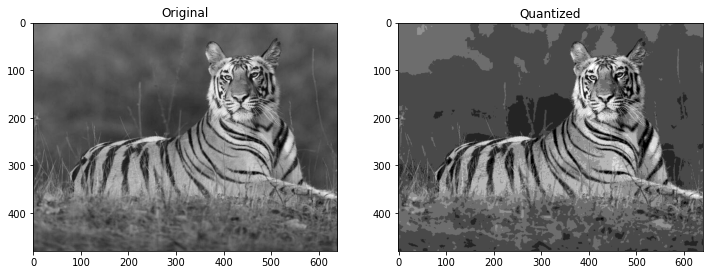

In [ ]:
# Activity 1.3

img_gray_cv = cv.cvtColor(rgb_img, cv.COLOR_RGB2GRAY)

img_quantized = img_gray_cv.copy()

# Setting
depth = 3
maxValue = 255
minValue = 0

qLevel = 2**depth
value = maxValue - minValue

# Quantization
y = 0
for row in img_quantized:
  x = 0
  for dot in row:
    img_quantized[y][x] = ((dot-minValue)/value)*qLevel
    x += 1
  y += 1

print(img_gray_cv)
print(img_quantized)

# Display
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_cv, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img_quantized, cmap='gray')
plt.title('Quantized')



Original: (480, 640)
Resized: (120, 160)


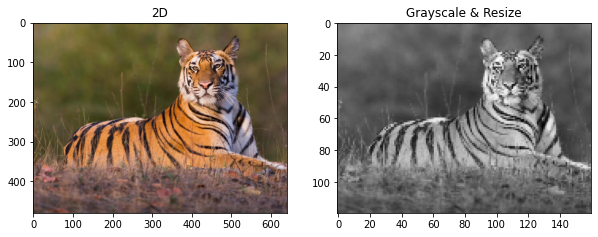

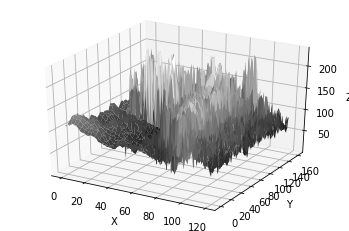

In [ ]:
 # Activity 1.4

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_img, cmap='gray')
plt.title('2D')

# Setting
width = 120
heigth = 160

img_gray_resized = cv.resize(img_gray_cv, (heigth, width))
print('Original:', img_gray_cv.shape)
print('Resize:', img_gray_resized.shape)

plt.subplot(1, 2, 2)
plt.imshow(img_gray_resized, cmap='gray')
plt.title('Grayscale & Resize')

fig = plt.figure()
ax = fig.add_subplot(projection='3d') #  The default None results in a 'rectilinear'

xx, yy = np.mgrid[0:img_gray_resized.shape[0], 0:img_gray_resized.shape[1]]
# print(xx)
# print(yy)

ax.plot_surface(xx, yy, img_gray_resized, cmap='gray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()